# IMPORTS

In [110]:
import os  # For operating system dependent functionality
import xarray as xr  # For working with labeled multidimensional arrays
import matplotlib as mpl  # For plotting
import matplotlib.pyplot as plt  # For creating plots
import matplotlib.colors as colors  # For working with colors in plots
import cartopy.crs as ccrs  # For coordinate reference systems
from cartopy.util import add_cyclic_point  # For adding cyclic points to data
import numpy as np  # For numerical computing
from matplotlib.colors import Normalize  # For normalizing colors in plots
import cartopy.crs as ccrs
import cartopy.feature as cfeature

print("Xarray version:", xr.__version__)
print("Matplotlib version:", mpl.__version__)

Xarray version: 2023.6.0
Matplotlib version: 3.7.3


# FUNCTIONS

In [111]:
# Define the function to calculate horizontal temperature difference
def horizontal_difference(plio_ds, pi_ds): 
    # Calculate the temperature difference between Pliocene and Preindustrial datasets
    diff = plio_ds['TEMP'] - pi_ds['TEMP']
    return diff

def plot_projection(ax, X, Y, Z, title):
    """
    Plot data on a map projection.

    Parameters:
    - ax: A GeoAxesSubplot instance representing the subplot where the data will be plotted.
    - X: Longitude coordinates of the data.
    - Y: Latitude coordinates of the data.
    - Z: Data values to be plotted.
    - title: Title of the plot.
    """
    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')  # Choose the colormap
    norm = colors.Normalize(vmin=-2, vmax=38)  # Normalize the color scale

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)  # Add cyclic point to data for smooth plotting along longitude

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)  # Create filled contour plot

    # Add coastlines to the plot
    ax.coastlines()  # Add coastlines to the plot

    # Set the title of the plot
    ax.set_title(title)  # Set the title of the plot

    return cs  # Return the contour set for potential colorbar use

# OPENING PREPROCESSED FILES

In [112]:
# Define the directory path for slice files
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/'

# List of file names to process for Pliocene (plio) and Preindustrial (pi) files respectively
pliofile_names = ['CCSM4_plio.nc', 'CESM1.2_plio.nc', 'CESM2_plio.nc', 'COSMOS_plio.nc',
                'EC_Earth3.3_plio.nc', 'HADGEM3_NEW_1997_plio.nc','MIROC4_2004_plio.nc', 'Utrecht_CESM1.0.5_plio.nc','IPSLCM6A_LR_plio.nc', 'GISS_plio.nc',
                'LEEDS_plio.nc', 'NorESM-F_plio.nc','IPSLCM5A_plio.nc', 'IPSLCM5A2_plio.nc']

pifile_names = ['CCSM4_pi.nc', 'CESM1.2_pi.nc',
                'CESM2_pi.nc', 'COSMOS_pi.nc', 'EC_Earth3.3_pi.nc', 'HADGEM3_NEW_1997_pi.nc',
                'MIROC4_2004_pi.nc', 'Utrecht_CESM1.0.5_pi.nc','IPSLCM6A_LR_pi.nc', 'GISS_pi.nc','LEEDS_pi.nc', 'NorESM-F_pi.nc', 'IPSLCM5A_pi.nc', 'IPSLCM5A2_pi.nc' ]

# Create empty lists to store sliced datasets for Pliocene and Preindustrial files
pisds = []
pliosds = []

# Loop over Pliocene file names
for fname in pliofile_names:
    # Open Pliocene dataset and append it to the list
    pliods = xr.open_dataset(os.path.join(path, fname))
    pliosds.append(pliods)
    
# Loop over Preindustrial file names
for fname in pifile_names:
    # Open Preindustrial dataset and append it to the list
    pids = xr.open_dataset(os.path.join(path, fname))
    pisds.append(pids)

print('done')  # Print 'done' when data loading is finished

done


# PLOTTING GLOBAL SST

In [113]:
# List of model names
model_names = ['CCSM4', 'CESM1.2', 'CESM2', 'COSMOS', 'EC_Earth3.3', 'HADGEM3', 'MIROC4', 'Utrecht',
               'IPSLCM6A', 'GISS', 'LEEDS', 'NorESM-F', 'IPSLCM5A', 'IPSLCM5A2']

## PLIOCENE SST

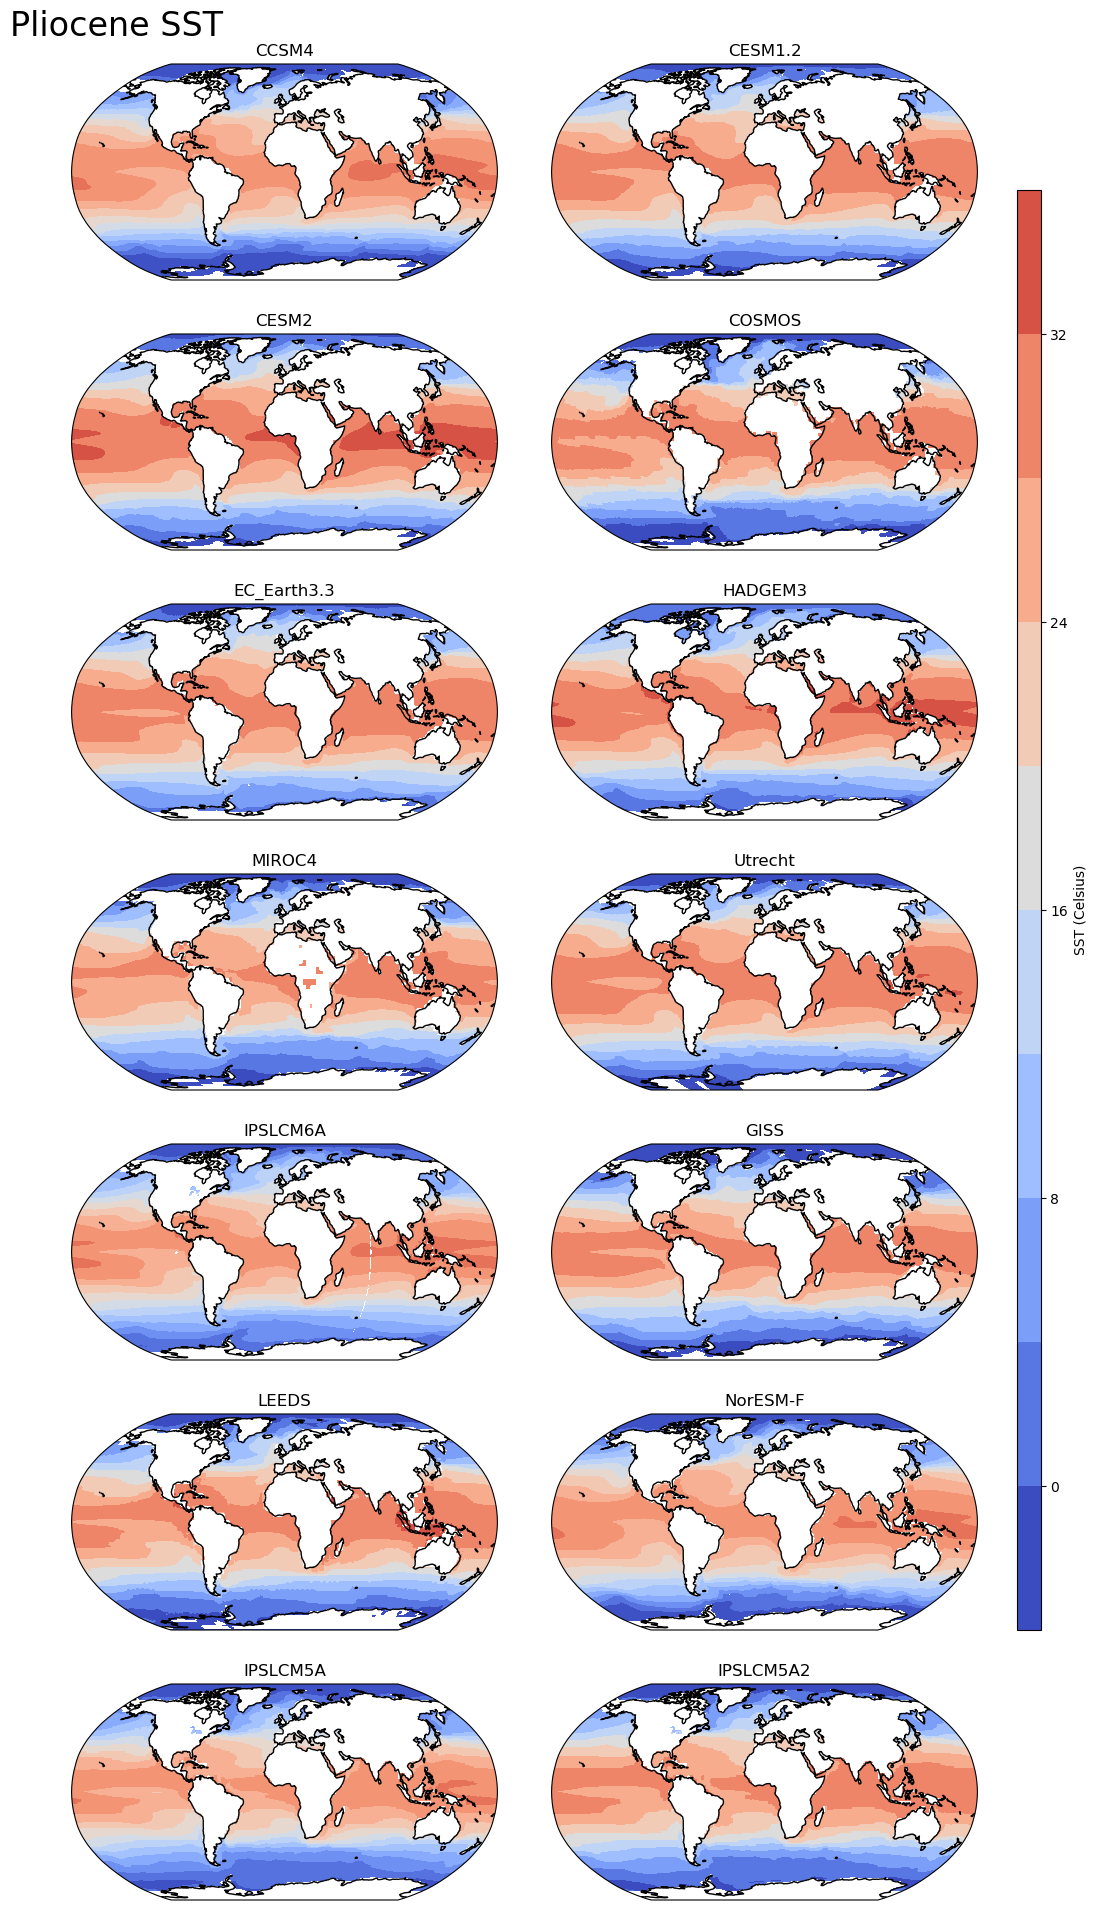

In [114]:
# Create a 7x2 grid for Pliocene datasets with a Robinson projection
fig, axs = plt.subplots(7, 2, figsize=(12, 18), subplot_kw={'projection': ccrs.Robinson()})
fig.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)  # Adjust the spacing and top margin

# Overall title for the entire figure
fig.suptitle('Pliocene SST', fontsize=24, y=1., x=0.05)  # Set the title position

# Iterate over Pliocene datasets and corresponding model names
for i, (pliods, model_name) in enumerate(zip(pliosds[:14], model_names[:14])):
    # Determine the subplot position in the 7x2 grid
    row, col = divmod(i, 2)

    # Create a subplot and set the position
    ax = axs[row, col]

    # Set the position for non-empty subplot
    ax.set_position([col * 0.4, 1 - (row + 1) * 0.15, 0.38, 0.12])

    # Call the modified plot_projection function
    cs = plot_projection(ax, pliods['lon'], pliods['lat'], pliods['TEMP'][0, :, :], title=model_name)

# Add a vertical colorbar on the right side of the subplots
cbar_ax = fig.add_axes([0.8, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', label='SST (Celsius)')

# Setting output path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/'

# Save the figure before calling plt.show()
plt.savefig(path + 'plio_sst_figure.png', bbox_inches='tight')

# Show the plot
plt.show()

## PREIDUSTRIAL SST

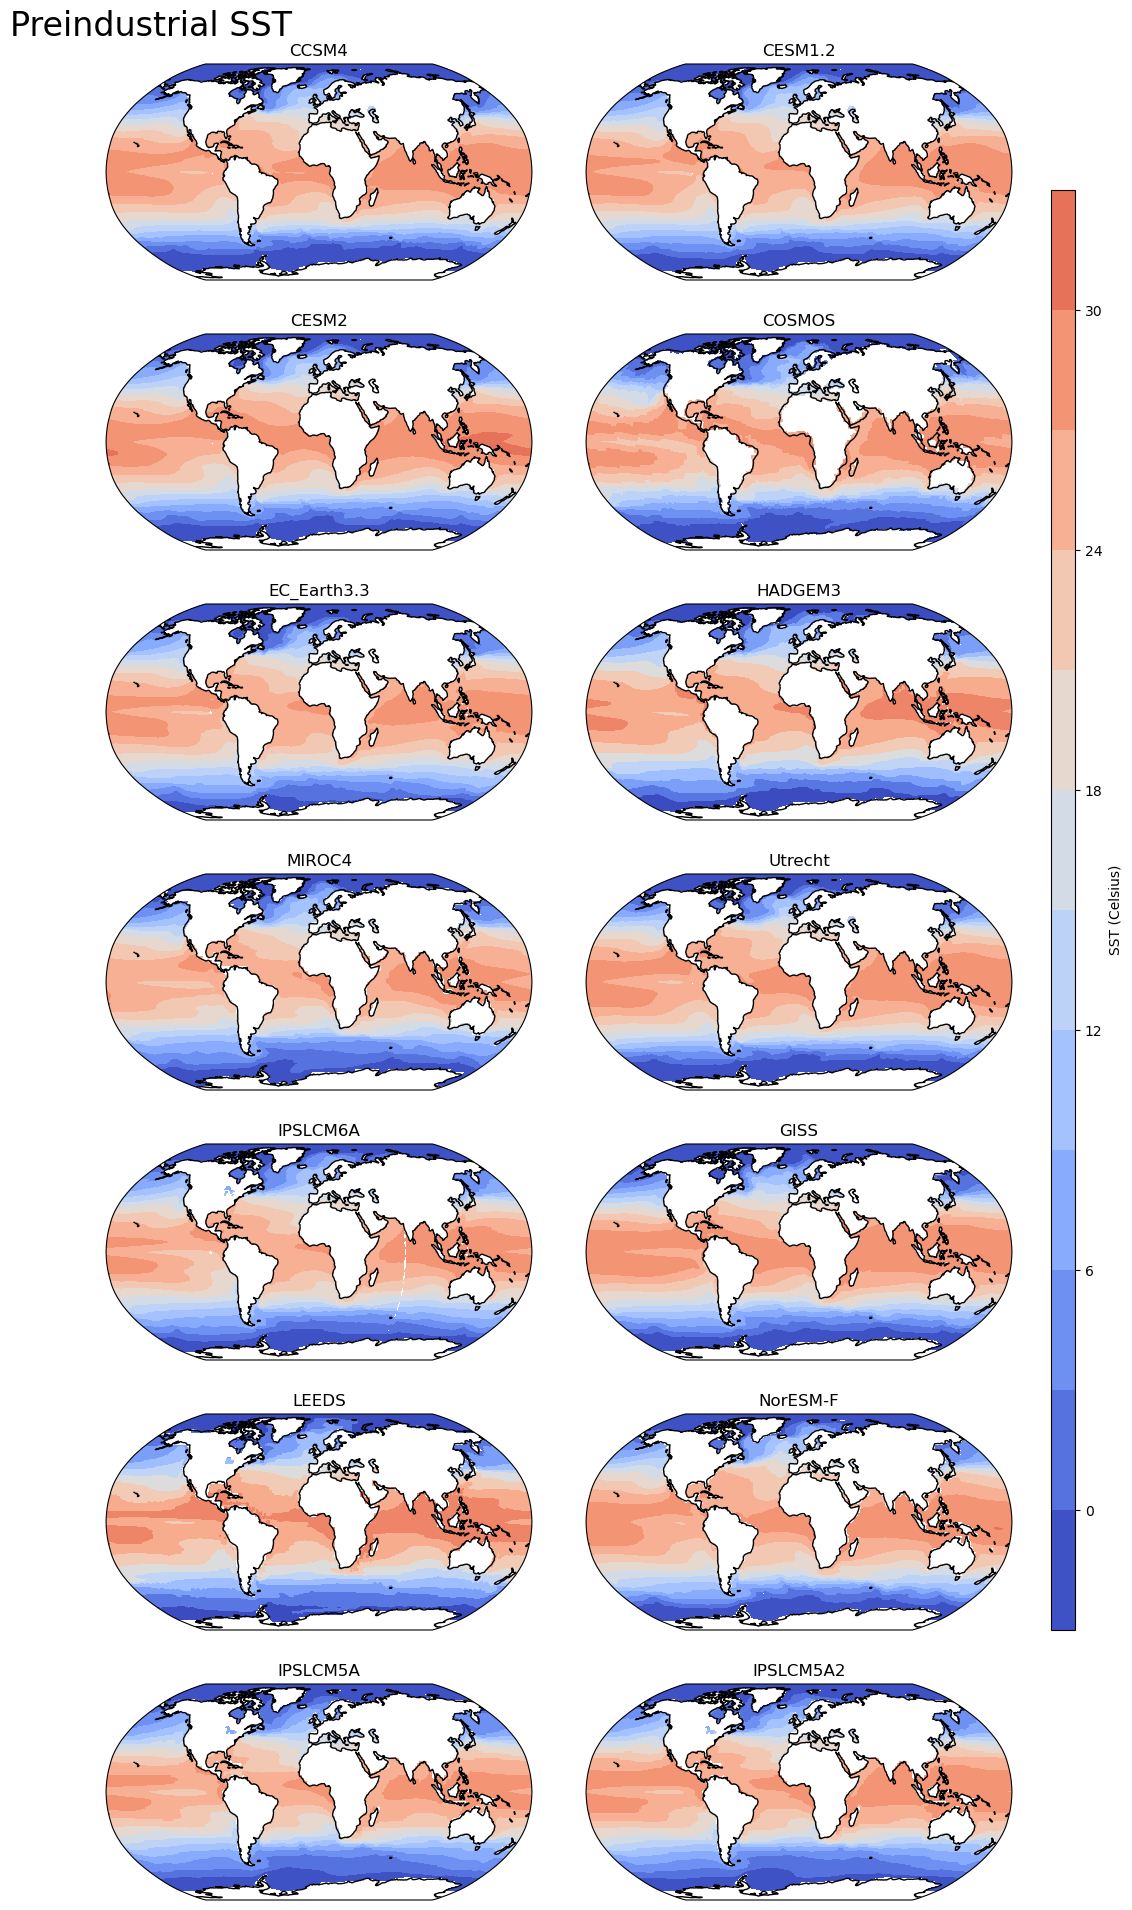

In [118]:
# Create a 7x2 grid for Preindustrial datasets with a Robinson projection
fig, axs = plt.subplots(7, 2, figsize=(12, 18), subplot_kw={'projection': ccrs.Robinson()})
fig.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)  # Adjust the spacing and top margin

# Overall title for the entire figure
fig.suptitle('Preindustrial SST', fontsize=24, y=1., x=0.05)  # Set the title position

# Iterate over Preindustrial datasets and corresponding model names
for i, (pids, model_name) in enumerate(zip(pisds[:14], model_names[:14])):
    # Determine the subplot position in the 7x2 grid
    row, col = divmod(i, 2)

    # Create a subplot and set the position
    ax = axs[row, col]

    # Set the position for non-empty subplot
    ax.set_position([col * 0.4, 1 - (row + 1) * 0.15, 0.38, 0.12])

    # Call the modified plot_projection function
    cs = plot_projection(ax, pids['lon'], pids['lat'], pids['TEMP'][0, :, :], title=model_name)

# Add a vertical colorbar on the right side of the subplots
cbar_ax = fig.add_axes([0.8, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', label='SST (Celsius)')

# Setting output path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/'

# Save the figure
fig.savefig(path + 'preindustrial_sst_figure.png', bbox_inches='tight')

# Show the plot
plt.show()

# Pliocene - PI Control

done


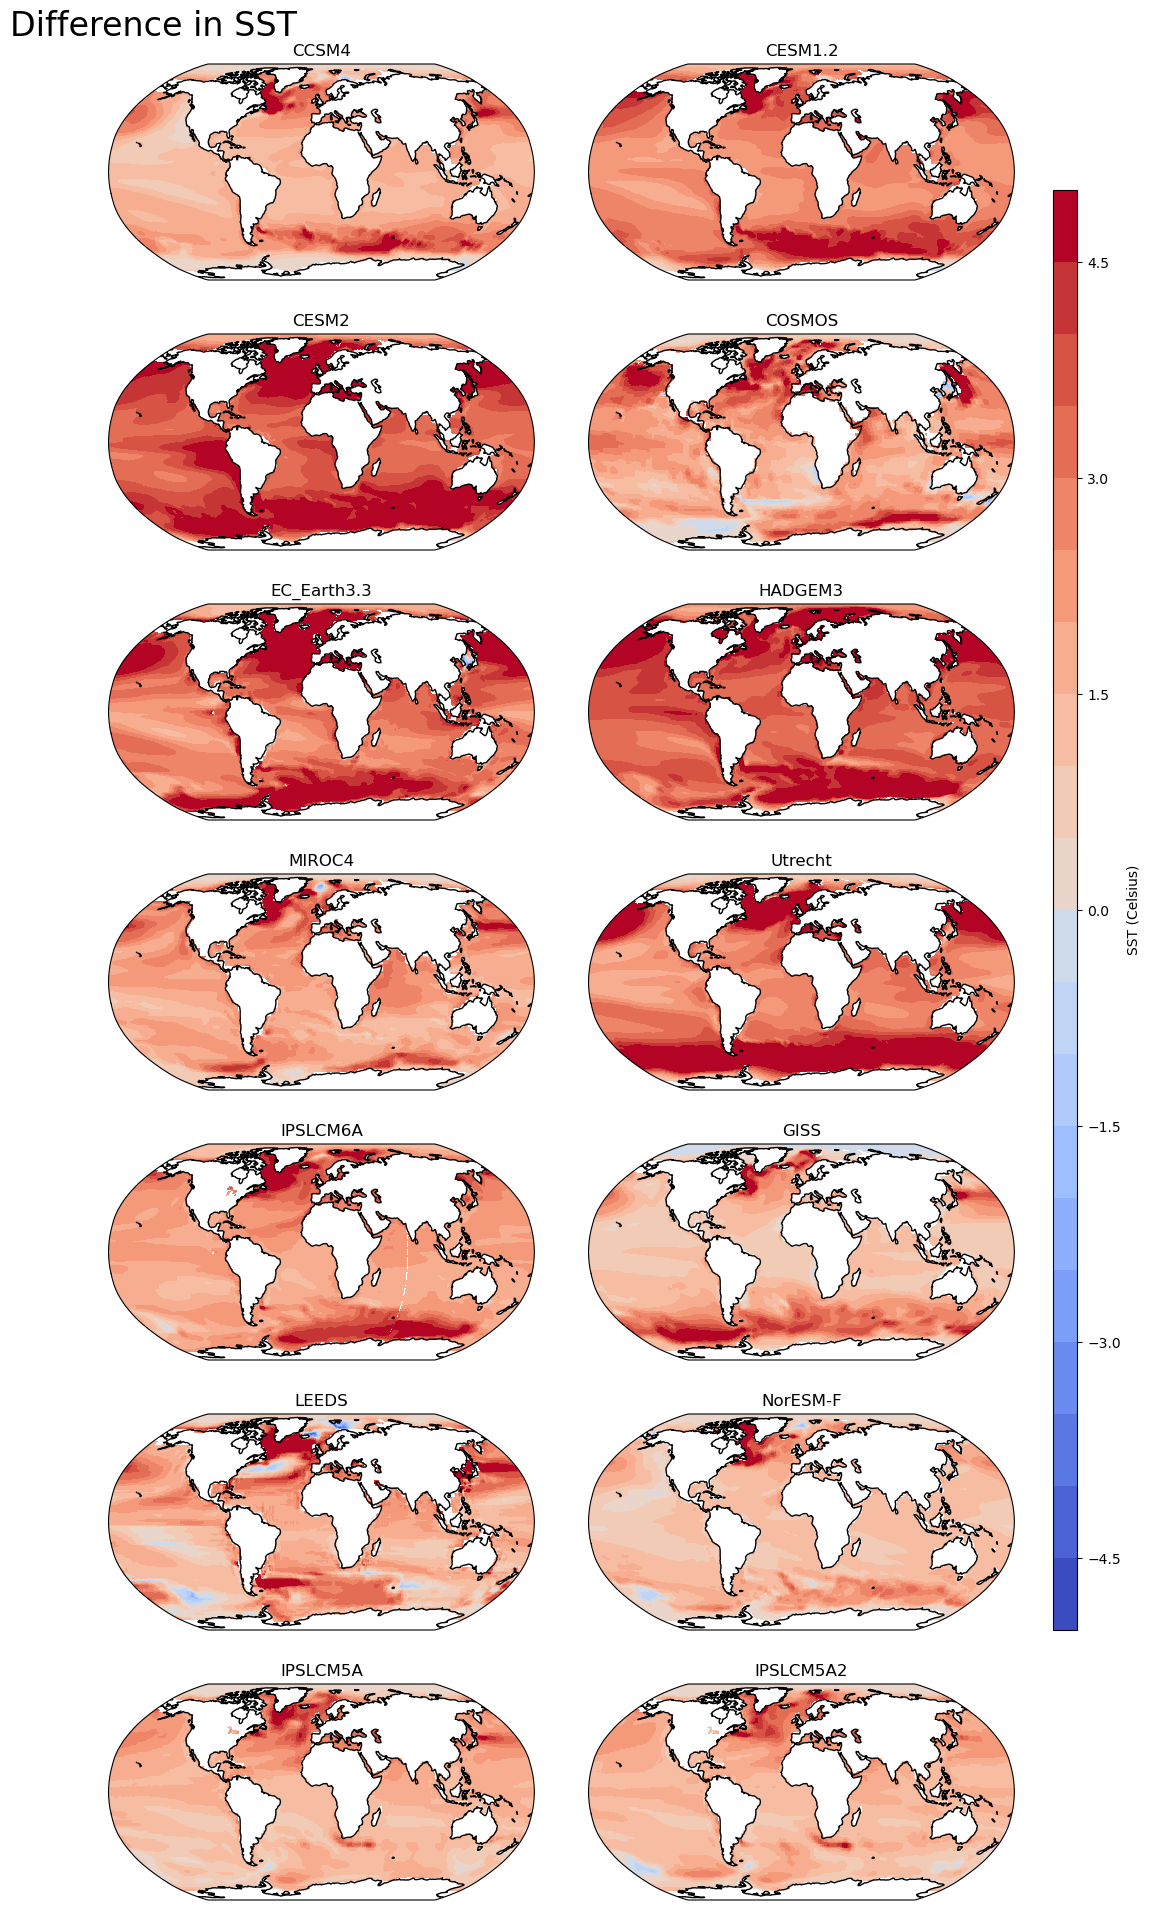

In [119]:
# Create an empty list to store model anomalies
model_anomalies = []

# Iterate through pliosds and pisds within the specified range
for i in range(14):  # Iterating from 0 to 13 (inclusive)
    plio_ds = pliosds[i]
    pi_ds = pisds[i]
    # Calculate the temperature difference between Pliocene and Preindustrial datasets
    difference_array = horizontal_difference(plio_ds, pi_ds)
    model_anomalies.append(difference_array)  # Append the difference array to the list

print('done')  # Print 'done' to indicate completion of the calculation

def plot_projectiondiff(ax, X, Y, Z, title):
    """
    Plot data on a map projection with specified title and color normalization.

    Parameters:
        - ax: A GeoAxesSubplot instance representing the subplot where the data will be plotted.
        - X: Longitude coordinates of the data.
        - Y: Latitude coordinates of the data.
        - Z: Data values to be plotted.
        - title: Title of the plot.
    Returns:
        - cs: ContourSet for colorbar usage.
    """
    # Define contour levels and colormap for the temperature contour plot
    contour_levels = [-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    cmap = plt.get_cmap('coolwarm', 21)

    # Clip values above 5 to 5
    Z = np.clip(Z, -5, 5)

    # Set vmax to 5 to map any values greater than 5 to the maximum color
    norm = Normalize(vmin=-5, vmax=5)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=contour_levels, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Set the title of the plot
    ax.set_title(title)

    return cs  # Return the ContourSet for potential colorbar usage

# Create a 7x2 grid for SST anomalies with a Robinson projection
fig, axs = plt.subplots(7, 2, figsize=(12, 18), subplot_kw={'projection': ccrs.Robinson()})
fig.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)  # Adjust the spacing and top margin

# Overall title for the entire figure
fig.suptitle('Difference in SST', fontsize=24, y=1., x=0.05)  # Set the title position

# Iterate over SST anomalies and corresponding model names
for i, (diff, model_name) in enumerate(zip(model_anomalies[:14], model_names[:14])):
    # Determine the subplot position in the 7x2 grid
    row, col = divmod(i, 2)

    # Create a subplot and set the position
    ax = axs[row, col]

    # Set the position for non-empty subplot
    ax.set_position([col * 0.4, 1 - (row + 1) * 0.15, 0.38, 0.12])

    # Call the modified plot_projection function for plotting SST anomalies
    cs = plot_projectiondiff(ax, diff['lon'], diff['lat'], diff[0,:,:], title=model_name)

# Add a vertical colorbar on the right side of the subplots
cbar_ax = fig.add_axes([0.8, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', label='SST (Celsius)')

# Setting output path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/'

# Save the figure
fig.savefig(path + 'Pliocene-Preindustrial.png', bbox_inches='tight')

# Show the plot
plt.show()

# CREATING PACIFIC BASIN MASKING

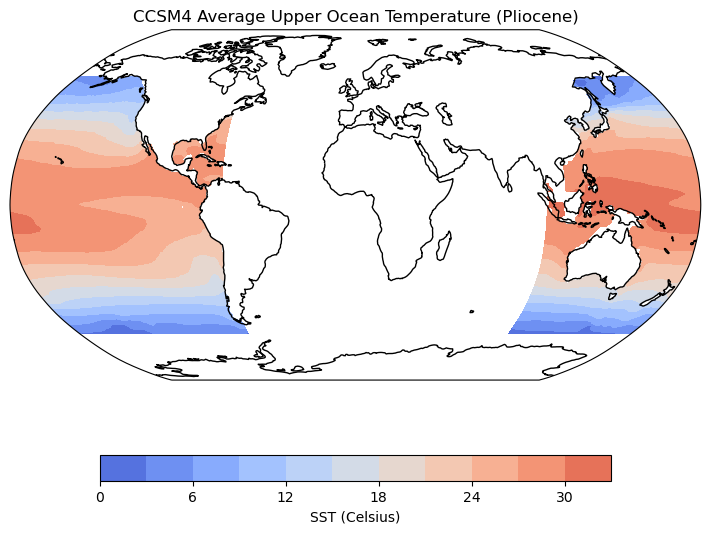

In [101]:
def create_pacific_mask(lon, lat):
    # Define latitude and longitude ranges for the Pacific Ocean basin
    lon_ranges = [(100.0, 260.0), (100.0, 275.0), (100.0, 290.0), (130.0, 290.0)]  # Ranges for the Pacific Ocean
    lat_ranges = [(15.0, 65.0), (10.0, 15.0), (-5.0, 10.0), (-60, 60.0)]  # Ranges for the Pacific Ocean

    # Create 2D mask array for ocean grid points
    pacific_mask = np.zeros((len(lat), len(lon)))

    # Mask out non-Pacific Ocean points
    for i in range(len(lon)):
        for j in range(len(lat)):
            lon_in_range = any(lon[i] >= lon_range[0] and lon[i] <= lon_range[1] for lon_range in lon_ranges)
            lat_in_range = any(lat[j] >= lat_range[0] and lat[j] <= lat_range[1] for lat_range in lat_ranges)
            if lon_in_range and lat_in_range:
                pacific_mask[j, i] = 1

    # Mask poleward of 60N
    pacific_mask[lat > 60.0, :] = 0

    return pacific_mask

pliofile_names_pacific = ['CCSM4_plio_pacific.nc', 'CESM1.2_plio_pacific.nc', 'CESM2_plio_pacific.nc', 
                          'COSMOS_plio_pacific.nc', 'EC_Earth3.3_plio_pacific.nc', 'HADGEM3_NEW_1997_plio_pacific.nc', 'MIROC4_2004_plio_pacific.nc', 
                          'Utrecht_CESM1.0.5_plio_pacific.nc', 'IPSLCM6A_LR_plio_pacific.nc', 'GISS_plio_pacific.nc', 'LEEDS_plio_pacific.nc', 
                          'NorESM-F_plio_pacific.nc', 'IPSLCM5A_plio_pacific.nc', 'IPSLCM5A2_plio_pacific.nc']

pifile_names_pacific = ['CCSM4_pi_pacific.nc', 'CESM1.2_pi_pacific.nc', 'CESM2_pi_pacific.nc', 'COSMOS_pi_pacific.nc', 'EC_Earth3.3_pi_pacific.nc', 
                        'HADGEM3_NEW_1997_pi_pacific.nc', 'MIROC4_2004_pi_pacific.nc', 'Utrecht_CESM1.0.5_pi_pacific.nc', 'IPSLCM6A_LR_pi_pacific.nc', 
                        'GISS_pi_pacific.nc', 'LEEDS_pi_pacific.nc', 'NorESM-F_pi_pacific.nc', 'IPSLCM5A_pi_pacific.nc', 'IPSLCM5A2_pi_pacific.nc']


# Define a function to plot data on a map projection
def pplot_projection(X, Y, Z, title):
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

# Extract the longitude, latitude, and temperature variables
lon = pliosds[0]['lon'].values
lat = pliosds[0]['lat'].values
temp_data = pliosds[0]['TEMP'].values

# Select a specific level (e.g., the first level)
level_index = 0
temp_data_level = temp_data[level_index, :, :]

# Create a Pacific mask using the function
pacific_mask = create_pacific_masknew(lon, lat)

# Apply the mask to the temperature data
pacific_temp_data = np.where(pacific_mask == 1, temp_data_level, np.nan)

# Plotting
pplot_projection(
    pliosds[0].lon,
    pliosds[0].lat,
    pacific_temp_data,
    title="CCSM4 Average Upper Ocean Temperature (Pliocene)"
)

In [107]:
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/Pacific Basin Files/'

for index, dataset in enumerate(pliosds):
    # Extract the longitude, latitude, level, and temperature variables
    lon = dataset['lon'].values
    lat = dataset['lat'].values
    lev = dataset['lev'].values
    temp_data = dataset['TEMP'].values

    # Create a Pacific mask using the function
    pacific_mask = create_pacific_masknew(lon, lat)

    # Apply the mask to the temperature data
    pacific_temp_data = np.where(pacific_mask == 1, temp_data, np.nan)

    # Create coordinates
    coords = {'lat': lat, 'lon': lon, 'lev': lev}

    # Create a DataArray with xarray including level information
    temp_data_array = xr.DataArray(pacific_temp_data, dims=('lev', 'lat', 'lon'), coords=coords)

    # Save the temperature data to a NetCDF file
    # Create a Dataset to hold the DataArray
    dataset = xr.Dataset({'TEMP': temp_data_array})

    # Save the Dataset to a NetCDF file
    filename = os.path.join(output_path, pliofile_names_pacific[index])
    dataset.to_netcdf(filename)

print('pliocene done')

for index, dataset in enumerate(pisds):
    # Extract the longitude, latitude, level, and temperature variables
    lon = dataset['lon'].values
    lat = dataset['lat'].values
    lev = dataset['lev'].values
    temp_data = dataset['TEMP'].values

    # Create a Pacific mask using the function
    pacific_mask = create_pacific_masknew(lon, lat)

    # Apply the mask to the temperature data
    pacific_temp_data = np.where(pacific_mask == 1, temp_data, np.nan)

    # Create coordinates
    coords = {'lat': lat, 'lon': lon, 'lev': lev}

    # Create a DataArray with xarray including level information
    temp_data_array = xr.DataArray(pacific_temp_data, dims=('lev', 'lat', 'lon'), coords=coords)

    # Save the temperature data to a NetCDF file
    # Create a Dataset to hold the DataArray
    dataset = xr.Dataset({'TEMP': temp_data_array})

    # Save the Dataset to a NetCDF file
    filename = os.path.join(output_path, pifile_names_pacific[index])
    dataset.to_netcdf(filename)

print('preindustrial done')

In [109]:
pliosds

[<xarray.Dataset>
 Dimensions:  (lev: 60, lat: 181, lon: 360)
 Coordinates:
     time     object ...
   * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
   * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
   * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
 Data variables:
     TEMP     (lev, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset>
 Dimensions:  (lev: 60, lat: 181, lon: 360)
 Coordinates:
   * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
     time     object ...
   * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
   * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
 Data variables:
     TEMP     (lev, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset>
 Dimensions:  (lev: 60, lat: 181, lon: 360)
 Coordinates:
   * lev      (lev) float32 5.0 15.0